In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [57]:
data=pd.read_csv("diabetes.csv")
data

,age,sex,bmi,bp,tc,ldl,hdl,tch,ltg,glu,response_interest
0,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87,151
1,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69,75
2,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85,141
3,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89,206
4,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80,135
...,...,...,...,...,...,...,...,...,...,...,...
437,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93,178
438,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102,104
439,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95,132
440,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85,220


In [58]:
data.shape

(442, 11)

In [76]:
y=data.iloc[:,-1]
y.head()

0    151
1     75
2    141
3    206
4    135
Name: response_interest, dtype: int64

In [95]:
x=data.iloc[:,2:3]
x.head()


,bmi
0,32.1
1,21.6
2,30.5
3,25.3
4,23.0


In [114]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()

In [115]:
x=scaler.fit_transform(x)
x[2:3]

array([[0.93453324]])

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [120]:
x_train.shape


(353, 1)

In [121]:
x_test.shape

(89, 1)

In [122]:
from sklearn.neighbors import KNeighborsRegressor

In [123]:
knn_reg = KNeighborsRegressor(n_neighbors=3, metric='euclidean')

In [152]:

knn_reg.fit(X, y)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

In [153]:
x_test = X.iloc[3:4,:]
y_hat_test = knn_reg.predict(x_test)
print("Actual target value for the sample in index 3 = {:.2f}".format(y[3]))
print("Estimated target value for the sample in index 3 = {:.2f}".format(y_hat_test[0]))

Actual target value for the sample in index 3 = 206.00
Estimated target value for the sample in index 3 = 161.33


In [163]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_test = knn_reg.predict(X)
mse = mean_squared_error(y, y_test)
mae = mean_absolute_error(y, y_test)
r2 = r2_score(y, y_test)
print("Training set MSE = {:.2f}".format(mse))
print("Training set MAE = {:.2f}".format(mae))
print("Training set R-sqaured = {:.2f}".format(r2))

Training set MSE = 2929.10
Training set MAE = 43.53
Training set R-sqaured = 0.51


C:\Users\asus\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


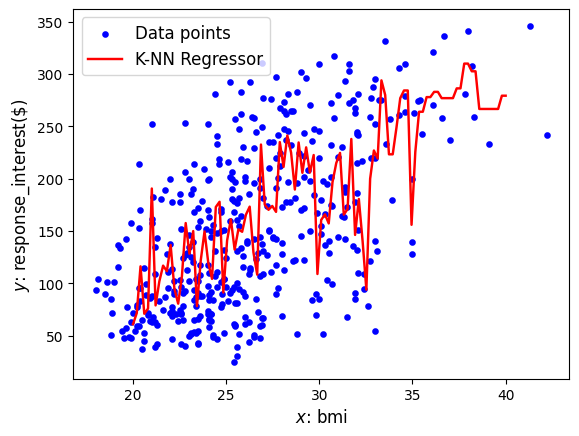

In [162]:
fig, ax = plt.subplots()
ax.scatter(X,y, color='blue', marker='.',linewidth=1.75,label='Data points')
ax.set_xlabel("$x $: bmi", fontsize=12);
ax.set_ylabel("$y $: response_interest(\$)", fontsize=12)

X_test = np.linspace(20,40,100).reshape(-1,1)
y_pred = knn_reg.predict(X_test)
ax.plot(X_test, y_pred, color='red', linewidth=1.75, label="K-NN Regressor")
ax.legend(fontsize=12)

plt.show()